In [7]:
import pandas as pd
lang1 = "en"
for lang2 in "da de fr hu lt no pl".split():
    try:
        path = f"datasets/{lang1}-{lang2}.csv"
        df = pd.read_csv(path, nrows=1_000_00)
    except FileNotFoundError:
        path = f"datasets/{lang2}-{lang1}.csv"
        df = pd.read_csv(path, nrows=1_000_00)
        
    print(df.shape)
    print(df.head())

(100000, 2)
                                           da  \
0  Et billede med et smil - og måske en tåre.   
1                                    Hospital   
2          Kvinden - hvis synd var moderskab.   
3                                      Alene.   
4                                     Manden.   

                                              en  
0  A picture with a smile - and perhaps, a tear.  
1                             "Charity Hospital"  
2          The Woman - whose sin was motherhood.  
3                                         Alone.  
4                                       The man.  
(100000, 2)
                                                  de  \
0                              Schaue um dich herum.   
1                         Alles bewegt, alles dreht.   
2                        So kommen wir auf die Welt.   
3  Die Sonne, der Mond, die Planeten und die Ster...   
4                       Und wir stehen in der Mitte.   

                                      

In [1]:
import pandas as pd

lang1 = "en"
lang2 = "fr"
path = f"datasets/{lang1}-{lang2}.csv"
# to avoid reading a large csv, fetch only the first 1M rows
df = pd.read_csv(path, nrows=1000000)
df.head()

,en,fr
0,I never dreamed before,l've never dreamed before l'm gonna knock the ...
1,I'm gonna knock the door into the world of per...,Into the world of perfect free You ain't no lo...
2,You're gonna say I'm lying I'm gonna get the c...,You're gonna say l'm lying l'm gonna get the c...
3,I thought a chance is far from me (You ain't n...,I thought a chance is far from me You ain't no...
4,I was made to hit in America (I was made to hi...,I was made to hit in America


<Axes: >

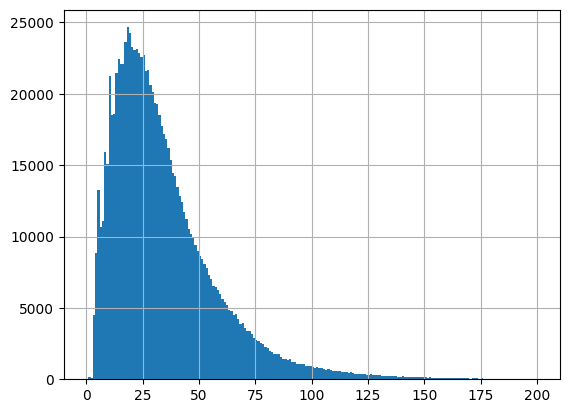

In [2]:
df[lang1].str.len().hist(bins=200, range=(0, 200))

<Axes: >

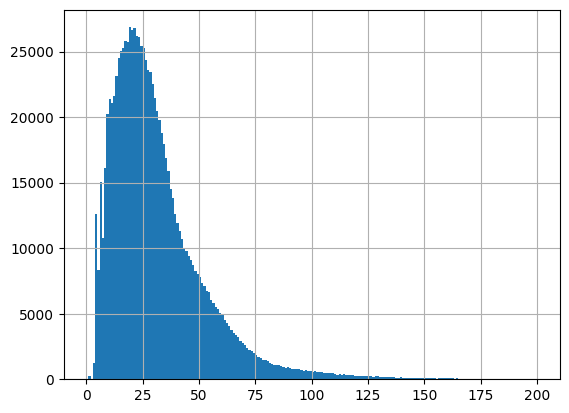

In [3]:
df[lang2].str.len().hist(bins=200, range=(0, 200))

In [4]:
src_len = df[lang1].str.len()
tgt_len = df[lang2].str.len()
# take the mean of the ratio between tgt-src
mean_len = (tgt_len / src_len).mean()
mean_len

1.004996065715665

(52941, 2)


<Axes: >

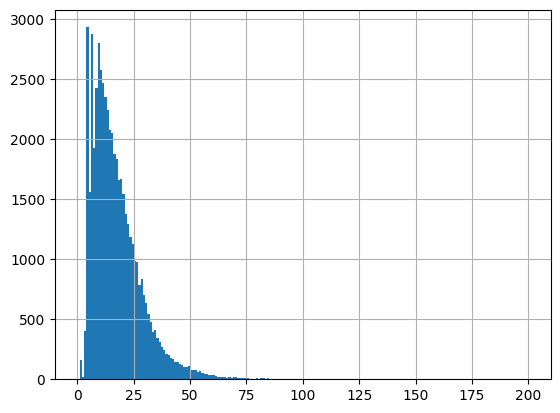

In [5]:
# non-weighted:
comp_rate = 0.5
_df = df[df[lang2].str.len() < comp_rate * df[lang1].str.len()]
print(_df.shape)
_df[lang2].str.len().hist(bins=200, range=(0, 200))

(969678, 2)


<Axes: >

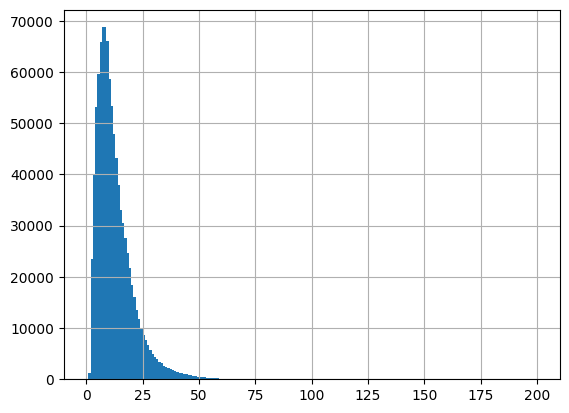

In [50]:
comp_rate = 1.0
_df = df[df[lang2].str.len() < mean_len * comp_rate * df[lang1].str.len()]
print(_df.shape)
_df[lang2].str.len().hist(bins=200, range=(0, 200))